# Mass Shootings Project

This would be my first analysis project using python and all of it's library for visualization and statistics. And because this is my first time, you will see bad coding, visualization, or even worse, you can't understand with what I'm doing here. But I really appreciate the your ideas and if you think I did something wrong and want me to change it, please contact me at bimaarinto@gmail.com 

Without further ado, let's jump in to the analysis!!

## About Dataset

First of all, I would like to give a deep condolences to every person, every family that lost their loved ones because of this cruel, inhuman crime.My deepest sympathies go out to you. May you find comfort and peace during the difficult time.

This Notebook is and exploratory analysis from a dataset of USA mass killings from 1966-2021. I got this dataset from Kaggle which you can get from this [Link](https://www.kaggle.com/datasets/zusmani/us-mass-shootings-last-50-years). 

---

### What is Mass Shootings?

According to the U.S Federal Bureau of Investigation (FBI), mass shootings, also called active shooter incident is an event in which or more individuals are actively engaged in killing or atempting to kill people in a populated area. And according to statistics compiled by Mother Jones magazine, more than a thousand people have killed in such attacks in 1982.

---

### How do They Have Guns?

Based on the pewresearch.org, The second Amandement to the U.S Constitution which reads: ”A well regulated Militia, being necessary to the security of a free State, the right of the people to keep and bear Arms, shall not be infringed.” gives Americans the right to bear arms, and about a third of the U.S adults say they personally own a gun.

---

### Is There Gun Control?

The gun control debate is still a topic of discussion in the U.S. Because the second amendment to the U.S constitution that allows people to own weapons. but at the same time with easy access to get them, criminals can get weapons easily and use them for crimes.

---

### What are We Trying to Achieve from This Analysis?

We are about to find out those questions below. I've been prepared all of the questions that related to statistics.

---

### Content

Geography: United States of America

Time period: 1966-2017

Unit of analysis: Mass Shooting Attack

Dataset: The dataset contains detailed information of 398 mass shootings in the United States of America that killed 1966 and injured 2488 people.

Variables: The dataset contains Serial No, Title, Location, Date, Summary, Fatalities, Injured, Tota; Victims, Mental Health Issue, Race, Gender, and Lat-Long information.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
warnings.filterwarnings("ignore")

---
### Importing Data and Data Wrangling

In [2]:
data = pd.read_csv('D:/Datasets/Mass Shootings Dataset Ver 5.csv', encoding="ISO-8859-1")
data.head(2)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S#                    323 non-null    int64  
 1   Title                 323 non-null    object 
 2   Location              278 non-null    object 
 3   Date                  323 non-null    object 
 4   Incident Area         261 non-null    object 
 5   Open/Close Location   295 non-null    object 
 6   Target                318 non-null    object 
 7   Cause                 246 non-null    object 
 8   Summary               323 non-null    object 
 9   Fatalities            323 non-null    int64  
 10  Injured               323 non-null    int64  
 11  Total victims         323 non-null    int64  
 12  Policeman Killed      317 non-null    float64
 13  Age                   179 non-null    object 
 14  Employeed (Y/N)       67 non-null     float64
 15  Employed at           4

In [4]:
missing_values = data.isnull().sum()

print(missing_values)

S#                        0
Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
dtype: int64


In [5]:
#convert the age column to numeric
data['Age']= pd.to_numeric(data['Age'], errors='coerce')
#Remove missing value
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [6]:
data.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,323.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,32.120690,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,9.634382,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,29.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,32.120690,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,34.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,70.000000,1.000000,60.790539,-69.707823


---
### How many people got injured per year?

In [7]:
data.head(1)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26.0,NaN,NaN,No,White,M,NaN,NaN


In [8]:
#We Splitting date column into month, day, and year
data[["Month","Day","Year"]] = data["Date"].str.split("/",expand=True)
data.head(2)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Month,Day,Year
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,NaN,NaN,No,White,M,NaN,NaN,11,5,2017
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,NaN,NaN,No,White,M,NaN,NaN,11,1,2017


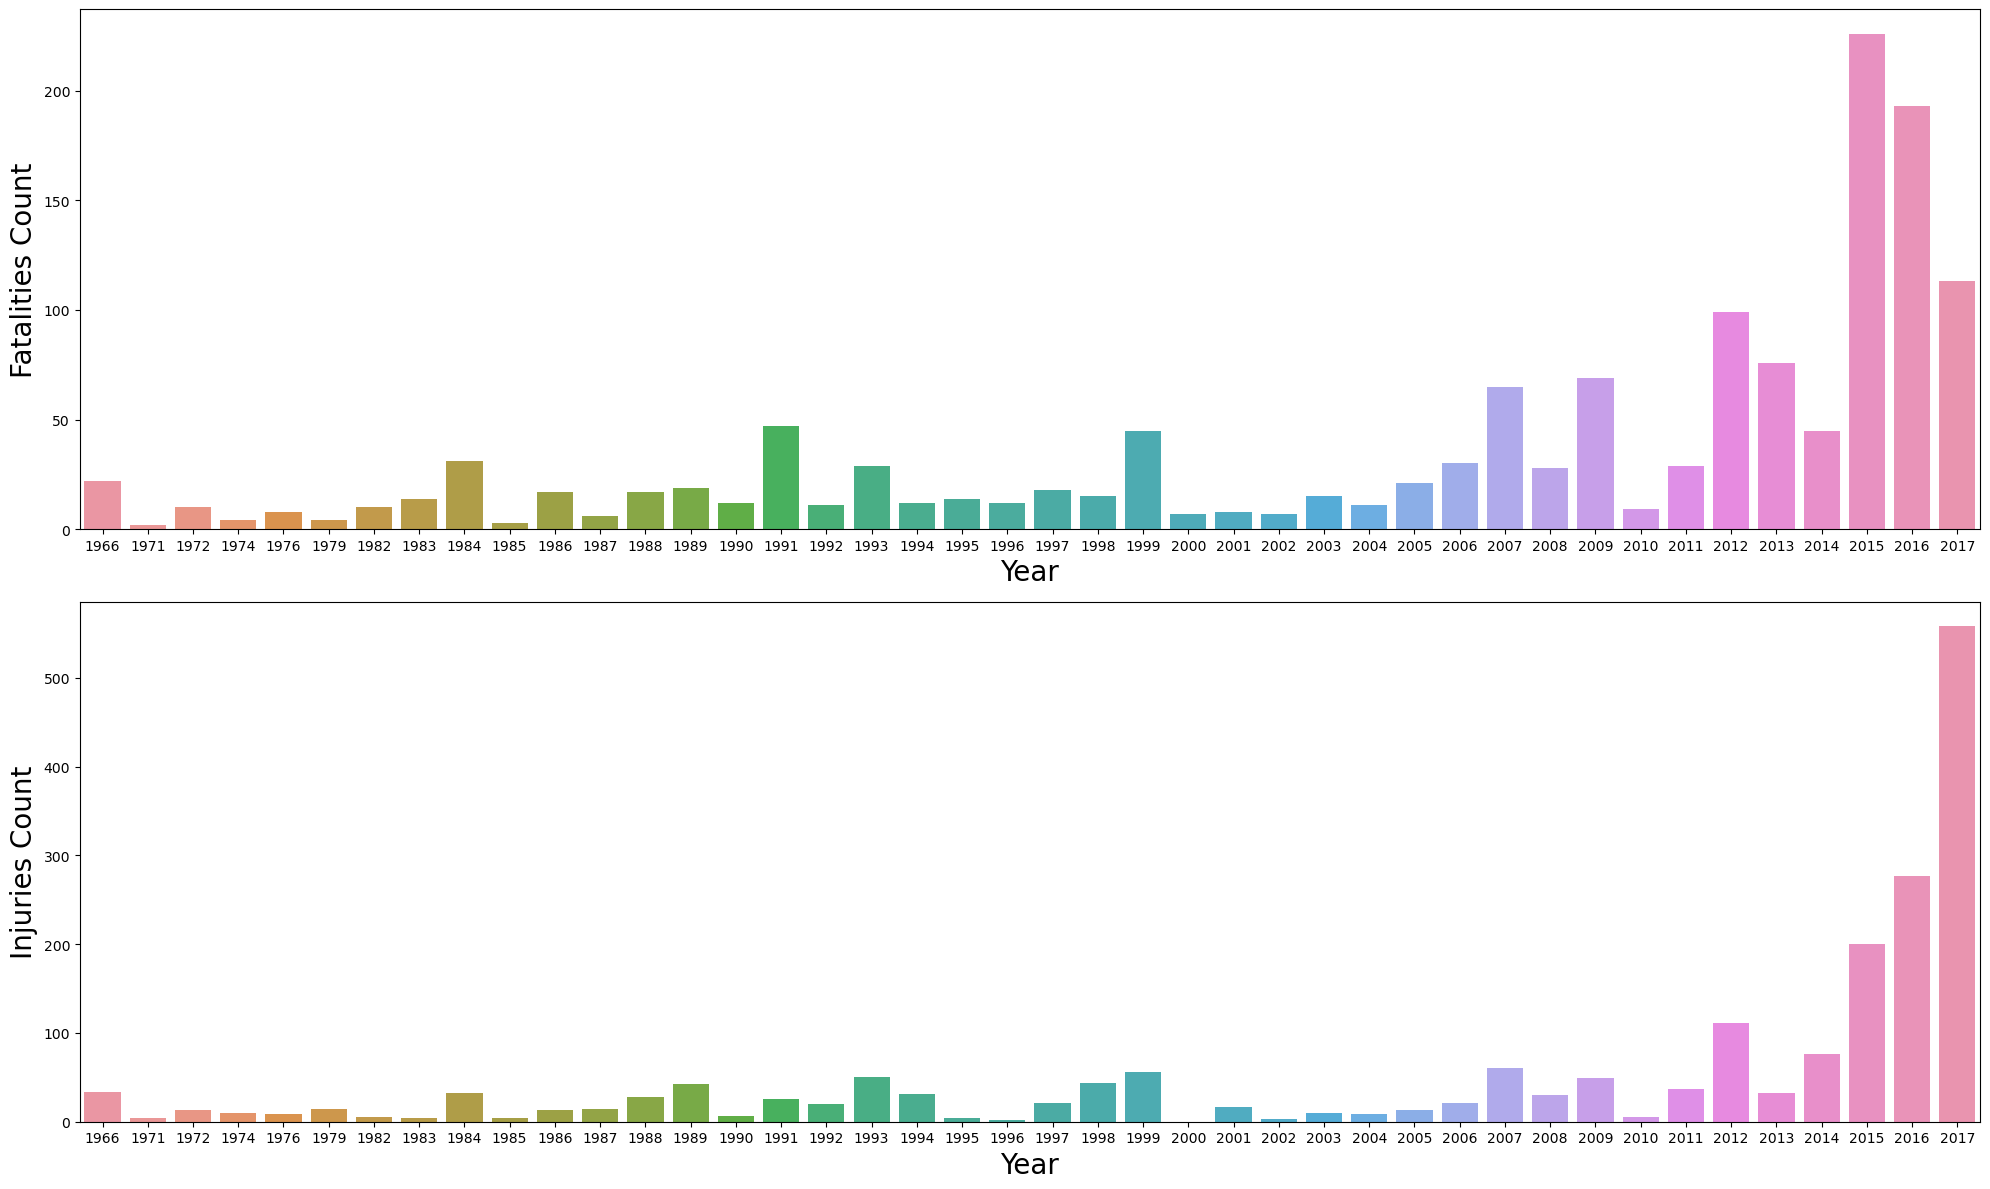

In [9]:
# Group data for fatalities per year
fatalities_per_year = data.groupby("Year")["Fatalities"].sum()

# Group data for injuries per year
injuries_per_year = data.groupby("Year")["Injured"].sum()

# Create subplots with two rows (one for fatalities, one for injuries)
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Create the first barplot for fatalities
sns.barplot(x=fatalities_per_year.index, y=fatalities_per_year.values, ax=axes[0])
axes[0].set_xlabel("Year", fontsize=20)
axes[0].set_ylabel("Fatalities Count", fontsize=20)

# Create the second barplot for injuries
sns.barplot(x=injuries_per_year.index, y=injuries_per_year.values, ax=axes[1])
axes[1].set_xlabel("Year", fontsize=20)
axes[1].set_ylabel("Injuries Count", fontsize=20)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

---
### Visualize mass shootings on the U.S map

In [10]:
data.head(2)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Month,Day,Year
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,NaN,NaN,No,White,M,NaN,NaN,11,5,2017
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,NaN,NaN,No,White,M,NaN,NaN,11,1,2017


In [11]:
data[["City", "State"]] = data["Location"].str.rsplit(",", 1, expand = True)

In [12]:
data["State"]

0               TX
1               CO
2               MD
3               NV
4               CA
          ...     
318       Illinois
319      Louisiana
320     Washington
321        Arizona
322          Texas
Name: State, Length: 323, dtype: object

we need to do data wrangling to get accurate state count

In [13]:
data["State"] = data["State"].str.strip() #to delete white spaces
abbreviations = data[data["State"].str.len() < 3] # to get all abbreviations

abbreviations["State"]

0      TX
1      CO
2      MD
3      NV
4      CA
5      PA
10     WA
11     LA
158    CA
Name: State, dtype: object

In [14]:
data["State"].value_counts().tail(10)

Indiana         1
South Dakota    1
Maine           1
CO              1
LA              1
WA              1
PA              1
NV              1
MD              1
Iowa            1
Name: State, dtype: int64

In [15]:
#replacing the state abbreviations with complete names so that we can get a complete count of states

data = data.replace({'State':{'LA' : "California", 'WA' : "Washington", "TX" : "Texas",
                         "PA":"Pennsylvania", "NV":"Nevada","MD":"Maryland", "CA":"California",
                         "CO": "Colorado" }})

data["State"].value_counts().tail(10)

Hawaii           1
Wyoming          1
Vermont          1
Maine            1
West Virginia    1
Idaho            1
Indiana          1
South Dakota     1
Maryland         1
Iowa             1
Name: State, dtype: int64

---
After we've done the abbreviations problem, we move to the next step by completing all the values for choropleth graph

In [16]:
#percent_killings
data["freq_count"] = data.groupby("State")["State"].transform('count')
data.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Race,Gender,Latitude,Longitude,Month,Day,Year,City,State,freq_count
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,White,M,NaN,NaN,11,5,2017,Sutherland Springs,Texas,18.0
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,White,M,NaN,NaN,11,1,2017,Thornton,Colorado,7.0
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,Black,M,NaN,NaN,10,18,2017,Edgewood,Maryland,1.0
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,White,M,36.181271,-115.134132,10,1,2017,Las Vegas,Nevada,6.0
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,Asian,M,NaN,NaN,6,14,2017,San Francisco,California,32.0


In [17]:
import plotly.express as px
import json
us_states = json.load(open("D:/Datasets/us-states.json", 'r'))
us_states["features"][1]["properties"] #check state ids and state names in the file

{'name': 'Alaska'}

In [18]:
data["State"].value_counts()

California        32
Florida           20
Texas             18
Washington        15
Georgia           13
North Carolina    11
Arizona           11
Ohio              10
New York          10
Illinois           9
Pennsylvania       9
Wisconsin          9
Alabama            9
Colorado           7
Nevada             6
Virginia           6
Michigan           6
Tennessee          5
Kentucky           5
South Carolina     5
Oklahoma           5
Louisiana          4
Oregon             4
Mississippi        4
Minnesota          4
Massachusetts      4
Kansas             4
Nebraska           3
Missouri           3
New Jersey         3
New Mexico         3
Connecticut        3
Arkansas           2
Montana            2
Utah               2
Alaska             1
Hawaii             1
Wyoming            1
Vermont            1
Maine              1
West Virginia      1
Idaho              1
Indiana            1
South Dakota       1
Maryland           1
Iowa               1
Name: State, dtype: int64

In [19]:
data1 = data #eliminate null data
data1=data1.dropna(subset=["State"])
data1["State"].isnull().count()

277

In [20]:
state_id_map_dict = {}

for feature in us_states["features"]:
    state_id_map_dict[feature["properties"]["name"]] = feature["id"]
    
data1["id"] = data1["State"].apply(lambda x:state_id_map_dict[x])
data1["State"].value_counts()

California        32
Florida           20
Texas             18
Washington        15
Georgia           13
North Carolina    11
Arizona           11
Ohio              10
New York          10
Illinois           9
Pennsylvania       9
Wisconsin          9
Alabama            9
Colorado           7
Nevada             6
Virginia           6
Michigan           6
Tennessee          5
Kentucky           5
South Carolina     5
Oklahoma           5
Louisiana          4
Oregon             4
Mississippi        4
Minnesota          4
Massachusetts      4
Kansas             4
Nebraska           3
Missouri           3
New Jersey         3
New Mexico         3
Connecticut        3
Arkansas           2
Montana            2
Utah               2
Alaska             1
Hawaii             1
Wyoming            1
Vermont            1
Maine              1
West Virginia      1
Idaho              1
Indiana            1
South Dakota       1
Maryland           1
Iowa               1
Name: State, dtype: int64

In [53]:
us_states = json.load(open("D:/Datasets/us-states.json", 'r'))
fig = px.choropleth(data1, 
                    locations="id", scope="usa",  
                    hover_name="State", geojson=us_states,
                    color = "freq_count", 
                    color_continuous_scale="jet"
                   )
fig.show()


Based on the map above, California has killing of 30%, and the second place is from Florida with 20%.

---

In [22]:
data1["id"].value_counts()

CA    32
FL    20
TX    18
WA    15
GA    13
NC    11
AZ    11
OH    10
NY    10
IL     9
PA     9
WI     9
AL     9
CO     7
NV     6
VA     6
MI     6
TN     5
KY     5
SC     5
OK     5
LA     4
OR     4
MS     4
MN     4
MA     4
KS     4
NE     3
MO     3
NJ     3
NM     3
CT     3
AR     2
MT     2
UT     2
AK     1
HI     1
WY     1
VT     1
ME     1
WV     1
ID     1
IN     1
SD     1
MD     1
IA     1
Name: id, dtype: int64

In [23]:
data.groupby('City')[['Total victims', 'Injured', 'Fatalities']].sum().sort_values(['Total victims'], ascending=False).head(15).style.background_gradient(cmap='Reds')

,Total victims,Injured,Fatalities
City,,,
Las Vegas,597,535,65
Orlando,119,63,56
Aurora,87,71,16
Killeen,71,40,34
San Bernardino,70,42,30
Fort Hood,60,44,16
Blacksburg,55,23,32
Austin,48,32,17
Sutherland Springs,46,20,26


---
### Any correlaton between shooter and his/her race, gender?

In [24]:
data.head(2)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Race,Gender,Latitude,Longitude,Month,Day,Year,City,State,freq_count
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,White,M,NaN,NaN,11,5,2017,Sutherland Springs,Texas,18.0
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,White,M,NaN,NaN,11,1,2017,Thornton,Colorado,7.0


In [25]:
#how many gender
data["Gender"].value_counts()

Male           272
Unknown         21
M               20
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64

In [26]:
data["Gender"]= data.Gender.replace("M", "Male")
data["Gender"]= data.Gender.replace("F", "Female")
data["Gender"]= data.Gender.replace("M/F", "Male/Female")

data["Gender"].value_counts()

Male           292
Unknown         21
Male/Female      5
Female           5
Name: Gender, dtype: int64

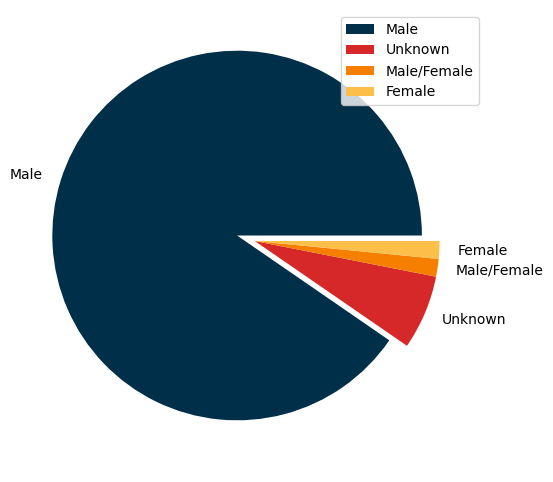

In [27]:
plt.figure(figsize=(11,6))
gender = data["Gender"].value_counts()
plt.pie(gender.values, labels = gender.index, explode = [0.1, 0.0, 0.0, 0.0], colors = ['#003049','#d62828','#f77f00', "#fcbf49"])
plt.legend()
plt.show()

This Piechart indicates that most of our shooters are male

In [28]:
data["Race"] = data["Race"].str.capitalize()
race = data["Race"].value_counts()
race

White american or european american                    122
Black american or african american                      76
Unknown                                                 42
White                                                   21
Some other race                                         20
Asian american                                          11
Black                                                    8
Asian                                                    6
Latino                                                   5
Native american or alaska native                         3
Other                                                    2
Two or more races                                        2
Black american or african american/unknown               1
White american or european american/some other race      1
Asian american/some other race                           1
Name: Race, dtype: int64

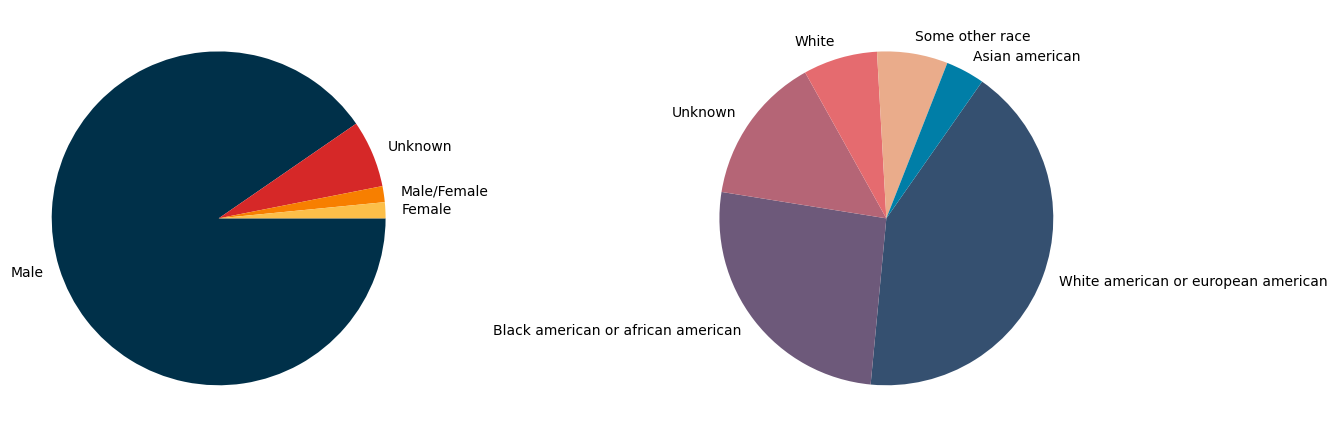

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,13))
ax1.pie(gender.values, labels = gender.index, counterclock = False, colors = ['#003049','#d62828','#f77f00', "#fcbf49"])

ax2.pie(race.values[:6], labels = race.index[:6], colors = ['#355070', '#6d597a', '#b56576', '#e56b6f', '#eaac8b', '#007ea7', '#0077b6'], counterclock = False, startangle = 55)

plt.subplots_adjust(wspace=0.6)
plt.show()

And from these Pie Charts, we have White American or European american that mostly cause the gun violence, followed by Black american or African american. 

---

### Top Cities with the Most Gun Violence Incidents

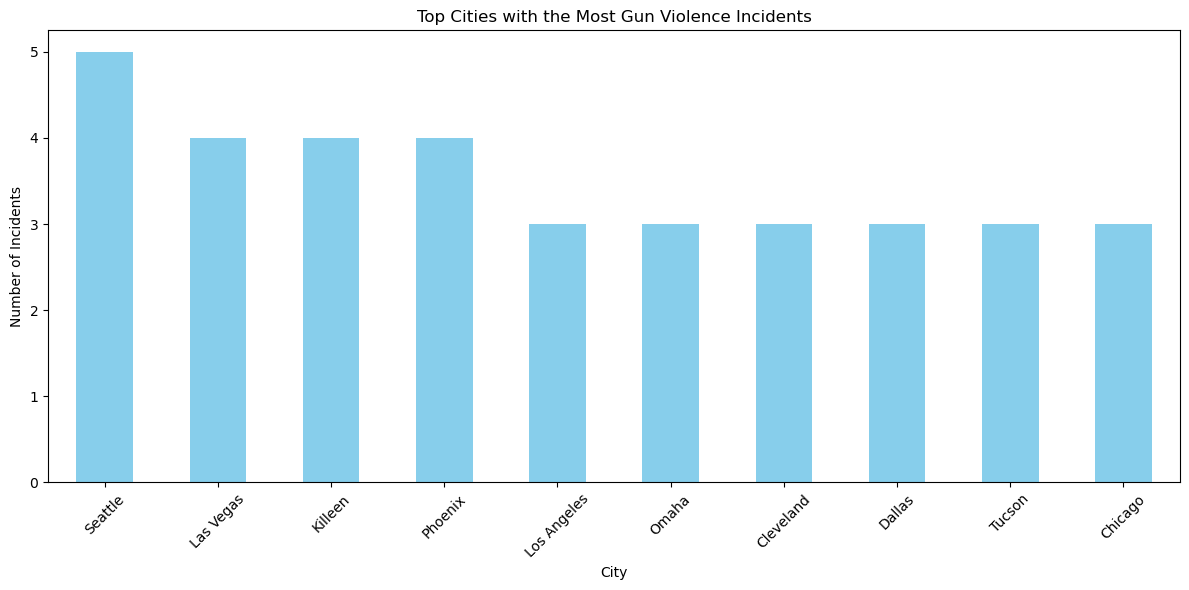

In [30]:
city_counts = data['City'].value_counts()

# Select the top N cities with the highest incident counts (e.g., top 10)
top_cities = city_counts.head(10)

# Create a bar chart to visualize the top cities with the most incidents
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.title('Top Cities with the Most Gun Violence Incidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

On the graph above, shows that the most gun violence incidents mostly happened in Seattle.

---
### Descriptive Statistics

In [31]:
mean_fatalities = data['Fatalities'].mean()
median_fatalities = data['Fatalities'].median()
std_fatalities = data['Fatalities'].std()

print(f"Mean Fatalities: {mean_fatalities}")
print(f"Median Fatalities: {median_fatalities}")
print(f"Standard Deviation of Fatalities: {std_fatalities}")

Mean Fatalities: 4.436532507739938
Median Fatalities: 3.0
Standard Deviation of Fatalities: 5.783207892616298


The mean fatalities of approximately 4.44 suggests that, on average, there are around 4.44 fatalities per incident in your dataset.

The median fatalities of 3.0 indicates that half of the incidents have 3 or fewer fatalities, and half have more than 3 fatalities. It represents the central value in the dataset.

The standard deviation of approximately 5.78 shows that the number of fatalities in the dataset varies, on average, by about 5.78 units from the mean. This suggests a moderate level of variability in the data.

---
### Distribution of Gun Violence Causes

We want to see what's the common cause Gun violence in United States of America and how many fatalities it occurs.

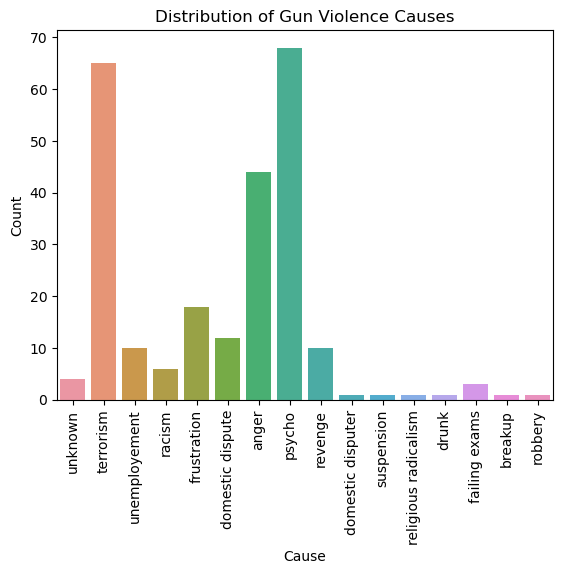

In [32]:
sns.countplot(data=data, x='Cause')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Distribution of Gun Violence Causes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Psycho and terrorism is our biggest causes of gun violence, which leads us to the next questions.

---
### Do Individuals with mental health issues (Frustation) tend to cause more severe incidents (higher fatalities or injuries?)

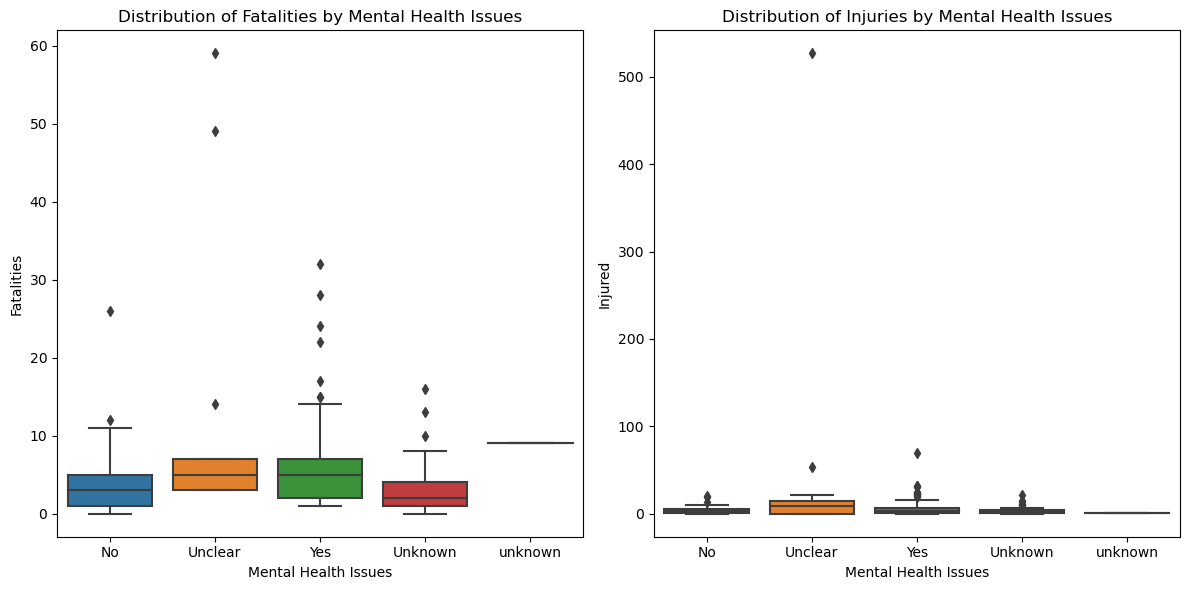

Fatalities: t-statistic = 2.9474679318032093, p-value = 0.0036176295547235508
Reject the null hypothesis: There is a significant difference in fatalities.
Injuries: t-statistic = 2.8629030230112282, p-value = 0.004860644077399617
Reject the null hypothesis: There is a significant difference in injuries.


In [34]:
# Create a subset of the data with rows where 'Mental Health Issues' is 'Yes' and 'No'
mental_health_yes = data[data['Mental Health Issues'] == 'Yes']
mental_health_no = data[data['Mental Health Issues'] == 'No']

# Perform t-tests for fatalities and injuries
t_stat_fatalities, p_value_fatalities = stats.ttest_ind(mental_health_yes['Fatalities'], mental_health_no['Fatalities'], equal_var=False)
t_stat_injuries, p_value_injuries = stats.ttest_ind(mental_health_yes['Injured'], mental_health_no['Injured'], equal_var=False)

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Visualization
# Create box plots to visualize the distribution of fatalities and injuries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Mental Health Issues', y='Fatalities', data=data)
plt.title('Distribution of Fatalities by Mental Health Issues')

plt.subplot(1, 2, 2)
sns.boxplot(x='Mental Health Issues', y='Injured', data=data)
plt.title('Distribution of Injuries by Mental Health Issues')

plt.tight_layout()
plt.show()

# Hypothesis Testing Results
print(f"Fatalities: t-statistic = {t_stat_fatalities}, p-value = {p_value_fatalities}")
if p_value_fatalities < alpha:
    print("Reject the null hypothesis: There is a significant difference in fatalities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fatalities.")

print(f"Injuries: t-statistic = {t_stat_injuries}, p-value = {p_value_injuries}")
if p_value_injuries < alpha:
    print("Reject the null hypothesis: There is a significant difference in injuries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in injuries.")

based on the boxplot, person with mental health issues tend to do more shooting massacre rather than who don't. We got unclear and unknown data since the shooters got killed in place or they don't want to speak about it.

In [35]:
# Sort the data by 'Fatalities' column in descending order
data_sorted_by_fatalities = data.sort_values(by='Fatalities', ascending=False)

# Display the top N incidents with the highest fatalities
N = 10  # You can adjust this number as needed
top_fatalities_incidents = data_sorted_by_fatalities.head(N)

# Print or display the top incidents
print("Top Incidents with Highest Fatalities:")
print(top_fatalities_incidents[['Title', 'Fatalities', 'Location', 'Date']])

# You can adjust the columns you want to display in the final output.

Top Incidents with Highest Fatalities:
                                   Title  Fatalities  \
3          Las Vegas Strip mass shooting          59   
13            Orlando nightclub massacre          49   
220               Virginia Tech massacre          32   
176         Sandy Hook Elementary School          28   
0             Texas church mass shooting          26   
287   Luby's Cafeteria in Killeen, Texas          24   
306  McDonald's restaurant in San Ysidro          22   
322        University of Texas at Austin          17   
81            San Bernardino, California          16   
249                Columbine High School          15   

                       Location        Date  
3                 Las Vegas, NV   10/1/2017  
13             Orlando, Florida   6/12/2016  
220        Blacksburg, Virginia   4/16/2007  
176        Newtown, Connecticut  12/14/2012  
0        Sutherland Springs, TX   11/5/2017  
287              Killeen, Texas  10/16/1991  
306      San Ysidro, C

---
### Are Gun Violence Incidents More Likely to Occur on Specific Days of the Week or Months?

Hypothesis Testing for days

Chi-Squared Statistic (Days): 0.0
P-value (Days): 1.0
Fail to reject the null hypothesis: Gun violence incidents are equally likely on all days.


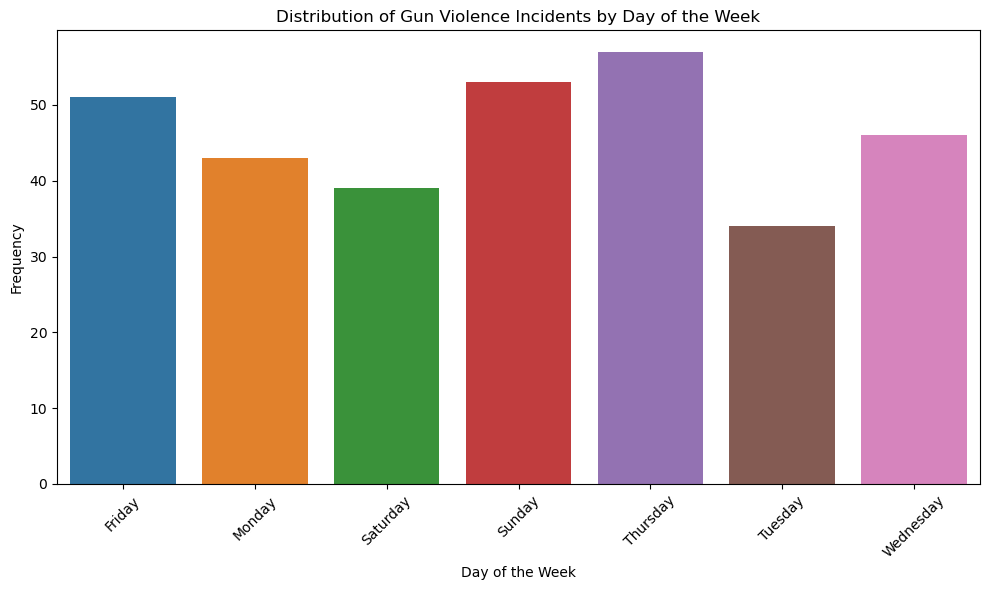

In [36]:
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()

# Create a contingency table for day of the week vs. frequency of incidents
contingency_table_day = pd.crosstab(index=data['DayOfWeek'], columns='count')

# Hypothesis Testing
# Perform a chi-squared test for day of the week vs. frequency of incidents
chi2_stat_day, p_value_day, _, _ = stats.chi2_contingency(contingency_table_day)

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Visualization
# Create a bar plot to visualize the distribution of incidents by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=contingency_table_day.index, y=contingency_table_day['count'])
plt.title('Distribution of Gun Violence Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Hypothesis Testing Results
print(f"Chi-Squared Statistic (Days): {chi2_stat_day}")
print(f"P-value (Days): {p_value_day}")
if p_value_day < alpha:
    print("Reject the null hypothesis: Gun violence incidents are not equally likely on all days.")
else:
    print("Fail to reject the null hypothesis: Gun violence incidents are equally likely on all days.")

Chi-Squared Statistic (Months): 0.0
P-value (Months): 1.0
Fail to reject the null hypothesis: Gun violence incidents are equally likely in all months.


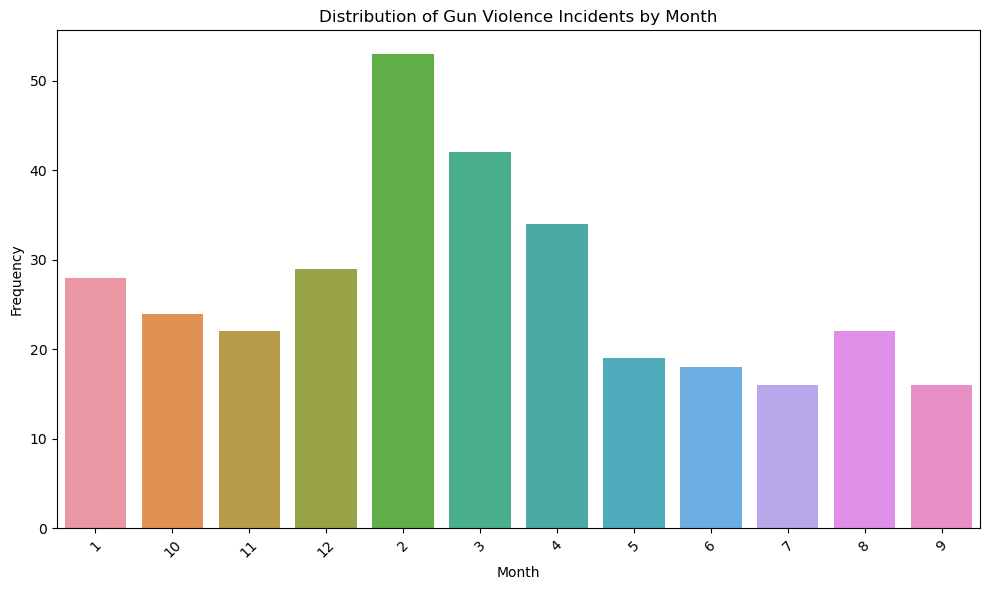

In [37]:
contingency_table_month = pd.crosstab(index=data['Month'], columns='count')

# Hypothesis Testing
# Perform a chi-squared test for month vs. frequency of incidents
chi2_stat_month, p_value_month, _, _ = stats.chi2_contingency(contingency_table_month)

# Visualization
# Create a bar plot to visualize the distribution of incidents by month
plt.figure(figsize=(10, 6))
sns.barplot(x=contingency_table_month.index, y=contingency_table_month['count'])
plt.title('Distribution of Gun Violence Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Hypothesis Testing Results
print(f"Chi-Squared Statistic (Months): {chi2_stat_month}")
print(f"P-value (Months): {p_value_month}")
if p_value_month < alpha:
    print("Reject the null hypothesis: Gun violence incidents are not equally likely in all months.")
else:
    print("Fail to reject the null hypothesis: Gun violence incidents are equally likely in all months.")

Based on the Data above, we have Thursday for the deadliest day, and February for the deadliest month. Friday and Sunday has almost similar value, it means that murderer try to go to holiday hotspot or building to execute their actions because at weekends, people go to convenient store, public places, and hangout places like cafe, or restaurant, or Casino.

---
### What places that has highest fatalities?

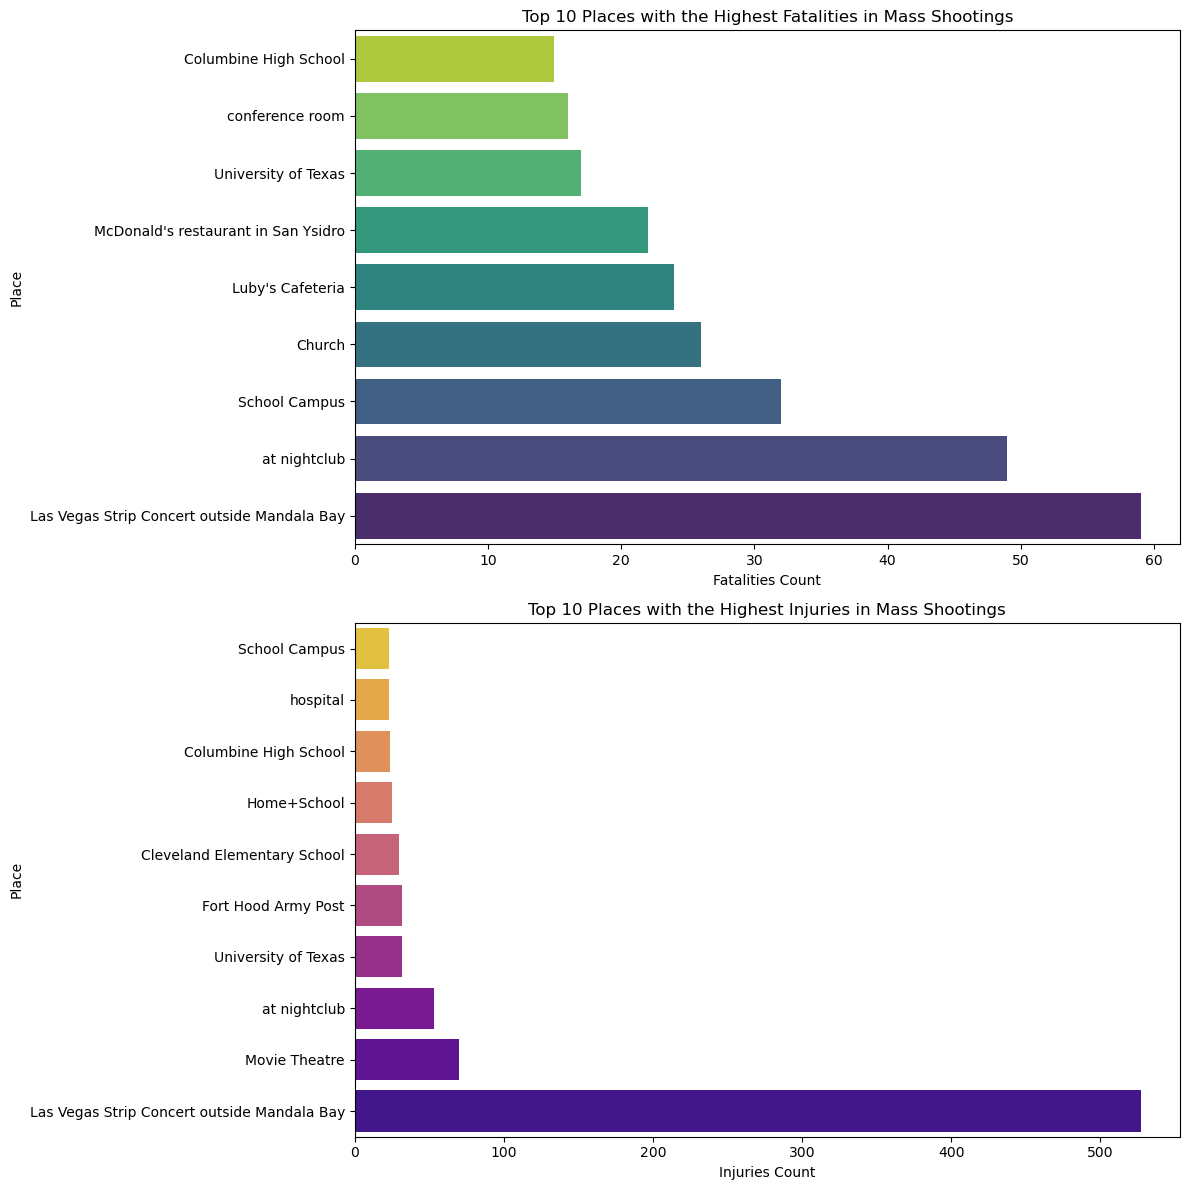

In [49]:
sorted_data_fatalities = data.sort_values(by='Fatalities', ascending=False)

# Select the top 10 rows (places with the highest fatalities)
top_10_places_fatalities = sorted_data_fatalities.head(10)

# Sort the DataFrame based on 'Injured' in descending order
sorted_data_injuries = data.sort_values(by='Injured', ascending=False)

# Select the top 10 rows (places with the highest injuries)
top_10_places_injuries = sorted_data_injuries.head(10)

# Create subplots for fatalities and injuries
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Create bar plots for fatalities
sns.barplot(x='Fatalities', y='Incident Area', data=top_10_places_fatalities, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Fatalities Count')
axes[0].set_ylabel('Place')
axes[0].set_title('Top 10 Places with the Highest Fatalities in Mass Shootings')

# Create bar plots for injuries
sns.barplot(x='Injured', y='Incident Area', data=top_10_places_injuries, ax=axes[1], palette='plasma')
axes[1].set_xlabel('Injuries Count')
axes[1].set_ylabel('Place')
axes[1].set_title('Top 10 Places with the Highest Injuries in Mass Shootings')

# Invert the y-axes for better visualization
axes[0].invert_yaxis()
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

We got Las Vegas Strip Concert outside Mandala bay as our highest fatalitiies because we have so many people killed there. And followed by nightclub for the second. for injuries we have movie theater, nightclub. This indicate that shooters tend to attack places with many people in it. And these place will be crowded in weekends.

---
###  Do the types of targets in gun violence incidents vary significantly based on the cause?

We want to see are there any specific target based on cause. we have our data called Target, which we get from further investigation from the incidents. 

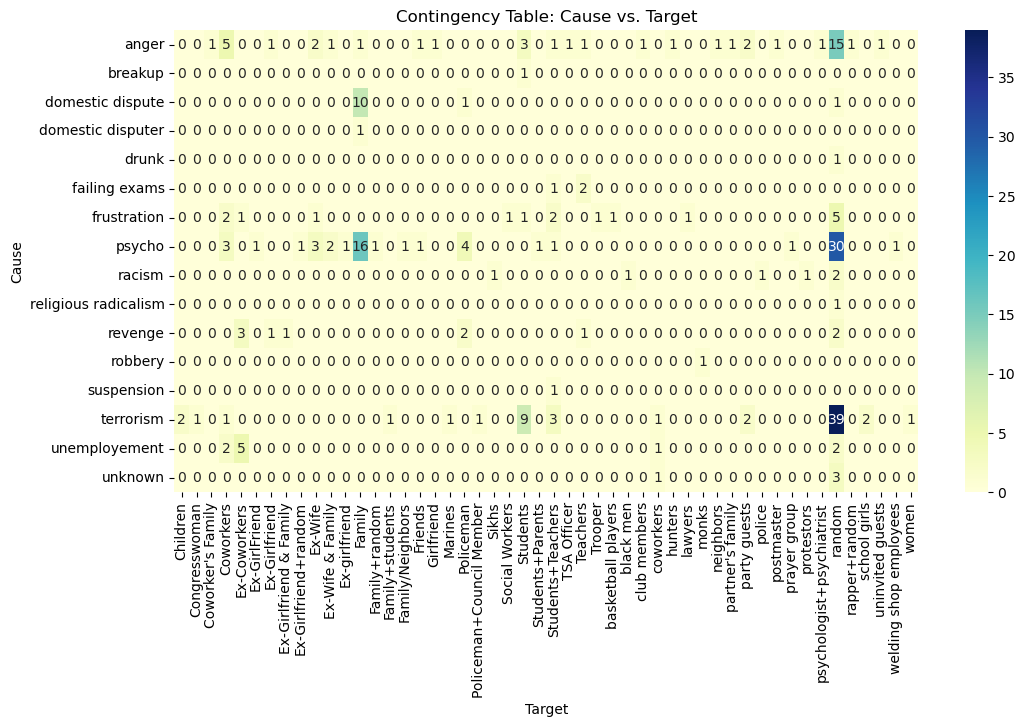

Chi-squared statistic = 1003.9861643716285
P-value = 1.2826100907465487e-10
Reject the null hypothesis: There is a significant association between cause and target.


In [47]:
contingency_table = pd.crosstab(data['Cause'], data['Target'])

# Perform the chi-squared test of independence
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Visualization
# Create a heatmap to visualize the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Contingency Table: Cause vs. Target')
plt.xlabel('Target')
plt.ylabel('Cause')
plt.show()

# Hypothesis Testing Results
print(f"Chi-squared statistic = {chi2}")
print(f"P-value = {p}")
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between cause and target.")
else:
    print("Fail to reject the null hypothesis: No significant association between cause and target.")

From the table above we can say that random target is the most common in shooting massacre, and caused by terrorism and psycho. And also we can see that psycho have 16 incidents that kills their related family.

---
### Is There a significant difference in the ages of individuals involved in gun violence incidents caused by different factors?

let's say we want to see if there is a difference in the age of the shooters caused by some factors. I will use 3 factors named frustration, psycho, and terrorism. I want to see what's the average of age from people who got frustration and tried to end people's life.

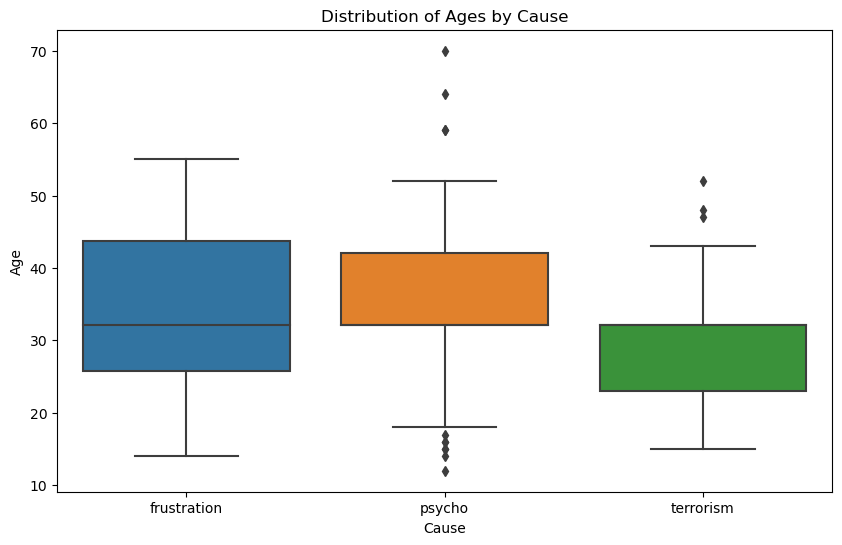

F-statistic = 3.788729692190164
P-value = 0.02484923270554884
Reject the null hypothesis: There is a significant difference in ages among the groups.


In [40]:
# Data Preparation
# Create subsets of the data for each cause
frustration = data[data['Cause'] == 'frustration']
psycho = data[data['Cause'] == 'psycho']
terrorism = data[data['Cause'] == 'terrorism']

# Perform ANOVA test to compare ages among the groups
f_statistic, p_value = stats.f_oneway(frustration['Age'], psycho['Age'], terrorism['Age'])

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Visualization
# Create box plots to visualize the distribution of ages for each cause
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cause', y='Age', data=data, order=['frustration', 'psycho', 'terrorism'])
plt.title('Distribution of Ages by Cause')
plt.xlabel('Cause')
plt.ylabel('Age')
plt.show()

# Hypothesis Testing Results
print(f"F-statistic = {f_statistic}")
print(f"P-value = {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ages among the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ages among the groups.")


based on the data above, we can see that people aged between 25 to 45 (with mean 32)suffer with frustration and it leads to shooting massacre. this situation is rather disheartening, as people tend to hide their feelings and don't want to talk about it to their family, or friends.

We also got so many outliers on other cause such as psycho and terrorism, we can also conclude terrorism affect more people from young adults. As In the context of mental health terminology and clonical psychology, psycho refer to someone who may have a mental illness or mental health problems, but it's not a specific diagnostic term used in the field of mental health. But if this dataset defined it as mental health issues, it may be possible to be used informally to describe individuals with mental health.

### Conclusion

Gun Violence or Mass shootings is unforgiveable action. But based on this mediocre analysis, I've found out that California and Florida has the highest incidents and fatalities. Authorities might want to consider and add more security for public places. 

And many shooters do their unforgiveable action because of frustration. from this we can always tell to our relatives that we are there for them, give them attention, and help them as we can.

as for race, every people can be mean and turned into psycho, doesn't matter if they are caucasian, or african american, or asian, people will still try to do evil thing. We must help each other, and throw away negative thoughts about the difference about our skin color.

this is just the beginning. I need to learn more and more about statistics. Because it's the fundamental parts of any data related field. I'm sorry if this analysis are messy and hard to understand for you, as I'm still learning and I really appreciate your time for reading my analysis and if you find something that I did wrong, please reach me on bimaarinto@gmail.com so I can fix it.

Thank you for reading this analysis and see you on the next part!!